In [1]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [28]:
print(tf.__version__)

2.4.0


In [ ]:
#Building a Sequential model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Softmax

In [30]:
#Build a feedforward neural network model
model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(16,activation='relu'),
    Dense(16,activation='relu'),
    Dense(10,activation='softmax')
])


In [31]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(784, 16) dtype=float32, numpy=
 array([[-0.06279187, -0.05809633,  0.08275968, ..., -0.03504479,
          0.04925555,  0.02541268],
        [ 0.01204287, -0.00413209, -0.03160956, ...,  0.03655203,
         -0.08331816, -0.0242618 ],
        [ 0.05209984,  0.0509326 ,  0.05946903, ..., -0.03610023,
         -0.0461901 , -0.04581968],
        ...,
        [ 0.05383433,  0.02256293,  0.01059336, ..., -0.07230592,
          0.04928823, -0.01146934],
        [-0.07141338,  0.00131556, -0.00305311, ...,  0.0090585 ,
          0.04553679, -0.0839928 ],
        [-0.0589104 ,  0.00443771,  0.04280493, ..., -0.01770069,
          0.07342371,  0.04975803]], dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(16,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(16, 16) dtype=float32, numpy=
 array([[ 0.3315147 ,  0.4032019 , -0.19078287, -0.172

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [33]:
#Convolutional and pooling layers¶
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [34]:
#Build a convolutional neural network model
model=Sequential([
    Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(3),
    Flatten(),
    Dense(10,activation='softmax')
    
    
])


In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


In [36]:
#The compile method¶
import tensorflow as tf

In [37]:
opt=tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(
optimizer=opt,
loss='sparse_categorical_crossentropy',
metrics=['accuracy','mae'])

In [38]:
print(model.loss)
print(model.optimizer.lr)
print(model.metrics)


sparse_categorical_crossentropy
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>
[]


In [39]:
#The fit method
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [40]:
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [41]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [42]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [43]:
# Rescale the image values so that they lie in between 0 and 1
train_images=train_images/255.
test_images=test_images/255.

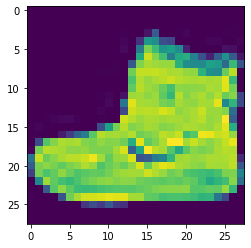

label: Ankle boot


In [44]:
# Display one of the images
import matplotlib.pyplot as plt
i=0
img=train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f'label: {labels[train_labels[i]]}')


In [45]:
# Fit the model
import numpy as np
history=model.fit(train_images[...,np.newaxis],train_labels,epochs=2,batch_size=256)

Epoch 1/2
235/235 [==============================] - 12s 48ms/step - loss: 0.8422 - accuracy: 0.7096 - mae: 4.4057
Epoch 2/2
235/235 [==============================] - 11s 48ms/step - loss: 0.3949 - accuracy: 0.8579 - mae: 4.4337


In [46]:
# Load the history into a pandas Dataframe

import pandas as pd
df=pd.DataFrame(history.history)
df

,loss,accuracy,mae
0,0.579552,0.794950,4.420001
1,0.387594,0.862367,4.420000


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

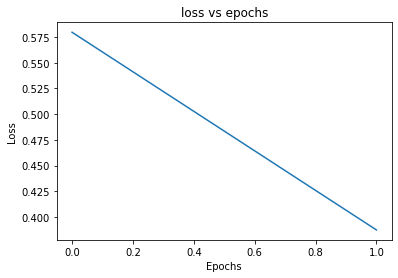

In [47]:
# Make a plot for the loss

loss_plot=df.plot(y='loss',title='loss vs epochs',legend=False)
loss_plot.set(xlabel='Epochs',ylabel='Loss')

In [48]:
#The evaluate and predict methods¶
import matplotlib.pyplot as plt
import numpy as np

In [49]:
# Evaluate the model
test_loss,test_accuracy,test_mae=model.evaluate(test_images[...,np.newaxis],test_labels)


313/313 [==============================] - 1s 4ms/step - loss: 0.3863 - accuracy: 0.8625 - mae: 4.4200


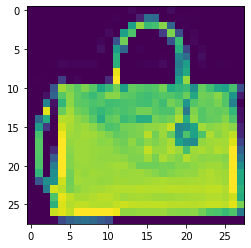

Label: Bag


In [50]:
#Make predictions from the model
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])
inx=30

test_image = test_images[inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[inx]]}")

Validation, regularisation and callbacks

In [51]:
import tensorflow as tf

In [52]:
#Validation sets
# Load the diabetes dataset
from sklearn.datasets import load_diabetes
diabetes_dataset=load_diabetes()
print(diabetes_dataset["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [53]:
# Save the input and target variables

#print(diabetes_dataset.keys
data=diabetes_dataset['data']
targets=diabetes_dataset['target']

In [54]:
targets

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [55]:
# Normalise the target data (this will make clearer training curves)

targets=(targets-targets.mean(axis=0))/targets.std()
targets

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [56]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
train_data,test_data,train_targets,test_targets=train_test_split(data,targets,test_size=0.1)
print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)



(397, 10)
(45, 10)
(397,)
(45,)


Train a feedforward neural network model

In [57]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
def get_model():
    model=Sequential([
        Dense(128,activation='relu',input_shape=(train_data.shape[1],)),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(128,activation='relu'),
        Dense(1)
        
        
    ])
    return model
model=get_model()

In [58]:
# Print the model summary

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               1408      
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                

In [59]:
# Compile the model
model.compile(optimizer='adam',loss='mse',metrics=['mae'])


In [60]:
# Train the model, with some of the data reserved for validation
history=model.fit(train_data,train_targets,epochs=100,validation_split=0.15,batch_size=64,verbose=False)

In [61]:
# Evaluate the model on the test set
model.evaluate(test_data,test_targets,verbose=2)

2/2 - 0s - loss: 0.8060 - mae: 0.7225


[0.8059549331665039, 0.7225022315979004]

Plot the learning curves

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

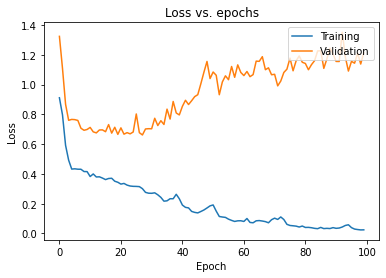

In [63]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

Model regularisation
Adding regularisation with weight decay and dropout

In [64]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [65]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128,kernel_regularizer=regularizers.l2(wd) ,activation="relu", input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128,kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128,kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128,kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128,kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128,kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [66]:
model=get_regularised_model(1e-5,0.3)

In [67]:
# Re-build the model with weight decay and dropout layers

model=get_regularised_model(1e-5,0.3)

In [68]:
# Compile the model

model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [69]:
# Train the model, with some of the data reserved for validation

model.fit(train_data,train_targets,epochs=100,validation_split=0.15,batch_size=64,verbose=False)

In [70]:
# Evaluate the model on the test set

model.evaluate(test_data,test_targets,verbose=2)

2/2 - 0s - loss: 0.6896 - mae: 0.6780


[0.6896300315856934, 0.6780229210853577]

#### Plot the learning curves

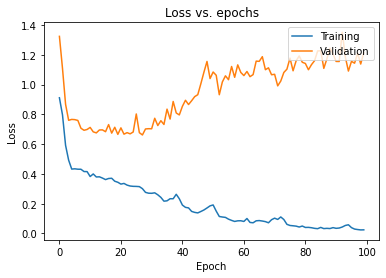

In [71]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

Introduction to callbacks
Example training callback


In [72]:
# Write a custom callback

from tensorflow.keras.callbacks import Callback

class PredictingCallback(Callback):
    def on_predict_begin(self,logs=None):
        print("Start Pradicting.....")
   
    def on_predict_batch_begin(self,batch,logs=None):
        print(f"Predicting: Starting Batch {batch}")
    def on_predict_batch_end(self,batch,logs=None):
        print(f"Predicting: Ending Batch {batch}")
   
    def on_predict_end(self,logs=None):
        print("Finished Predicting")
        

In [73]:
# Re-build the model

model=get_regularised_model(1e-5,0.3)

In [74]:
# Compile the model

model.compile(optimizer='adam',loss='mse')

In [75]:
##Train the model with the callback
# Train the model, with some of the data reserved for validation

model.fit(train_data,train_targets,epochs=3,batch_size=128,verbose=False,callbacks=[PredictingCallback()])

In [76]:
# Make predictions with the model

model.predict(test_data,verbose=False,callbacks=[PredictingCallback()])

Start Pradicting.....
Predicting: Starting Batch 0
Predicting: Ending Batch 0
Predicting: Starting Batch 1
Predicting: Ending Batch 1
Finished Predicting


array([[ 0.00195712],
       [ 0.030765  ],
       [-0.0443019 ],
       [-0.03646922],
       [-0.05469568],
       [ 0.00960049],
       [-0.05512708],
       [-0.00087714],
       [-0.05148137],
       [ 0.0125849 ],
       [-0.01926276],
       [-0.05074828],
       [ 0.02146933],
       [-0.01169159],
       [-0.05645872],
       [ 0.00120678],
       [-0.04645892],
       [-0.03173922],
       [-0.00488474],
       [ 0.01373011],
       [-0.00830504],
       [ 0.01162826],
       [-0.04176376],
       [-0.02425504],
       [-0.03947441],
       [-0.03983622],
       [ 0.01125442],
       [-0.02918623],
       [-0.00673134],
       [-0.01195853],
       [-0.02776376],
       [-0.00748042],
       [-0.05202219],
       [ 0.00289671],
       [-0.00276991],
       [-0.03416922],
       [-0.04142829],
       [-0.04137549],
       [-0.01777619],
       [ 0.01517672],
       [ 0.02333865],
       [-0.04722705],
       [ 0.04309051],
       [-0.02682312],
       [ 0.0006057 ]], dtype=flo

Early stopping / patience


In [77]:
# Re-train the unregularised model

unregularised_model=get_model()
unregularised_model.compile(optimizer='adam',loss='mse')
unreg_history=unregularised_model.fit(train_data,train_targets,validation_split=0.15,batch_size=64,epochs=100,verbose=False,callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])


In [78]:
# Evaluate the model on the test set

unregularised_model.evaluate(test_data,test_targets,verbose=2)

2/2 - 0s - loss: 0.6548


0.6548402309417725

In [79]:
# Re-train the regularised model
regularised_model=get_regularised_model(1e-8,0.2)
regularised_model.compile(optimizer='adam',loss='mse')
reg_history=regularised_model.fit(test_data,test_targets,epochs=100,validation_split=0.15,verbose=False,batch_size=64,callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])


In [80]:
# Evaluate the model on the test set

regularised_model.evaluate(test_data,test_targets,verbose=2)

2/2 - 0s - loss: 0.3284


0.32843250036239624

Plot the learning curves¶

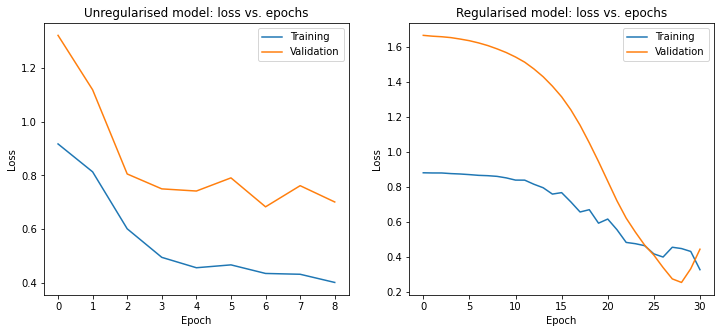

In [81]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()

Saving and loading models
Coding tutorials

Saving and loading model weights¶

In [82]:
# Import the CIFAR-10 dataset and rescale the pixel values

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Use smaller subset -- speeds things up
x_train = x_train[:10000]
y_train = y_train[:10000]
x_test = x_test[:1000]
y_test = y_test[:1000]

170500096/170498071 [==============================] - 2s 0us/step


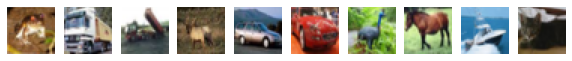

In [83]:
# Plot the first 10 CIFAR-10 images

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    ax[i].set_axis_off()
    ax[i].imshow(x_train[i])

Introduce two useful functions¶

In [84]:
# Introduce function to test model accuracy

def get_test_accuracy(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=0)
    print('accuracy: {acc:0.3f}'.format(acc=test_acc))

In [85]:
# Introduce function that creates a new instance of a simple CNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

def get_new_model():
    model = Sequential([
        Conv2D(filters=16, input_shape=(32, 32, 3), kernel_size=(3, 3), 
               activation='relu', name='conv_1'),
        Conv2D(filters=8, kernel_size=(3, 3), activation='relu', name='conv_2'),
        MaxPooling2D(pool_size=(4, 4), name='pool_1'),
        Flatten(name='flatten'),
        Dense(units=32, activation='relu', name='dense_1'),
        Dense(units=10, activation='softmax', name='dense_2')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

Create simple convolutional neural network classifier

In [86]:
# Create an instance of the model and show model summary

model1=get_new_model()
model1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
conv_2 (Conv2D)              (None, 28, 28, 8)         1160      
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 7, 7, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 392)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                12576     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 14,514
Trainable params: 14,514
Non-trainable params: 0
_________________________________________________

In [87]:
# Test accuracy of the untrained model, around 10% (random)

get_test_accuracy(model1,x_test,y_test)

accuracy: 0.094


Train model with checkpoints

In [88]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [89]:
# Create Tensorflow checkpoint object

checkpoint_path='model_checkpoints/checkpoint'
checkpoint=ModelCheckpoint(filepath=checkpoint_path,
                          frequency='epoch',
                          save_weights_only=True,
                          verbose=1)

In [90]:
# Fit model, with simple checkpoint which saves (and overwrites) model weights every epoch
model1.fit(x=x_train,
         y=y_train,
         epochs=3,
         callbacks=[checkpoint])


Epoch 1/3
313/313 [==============================] - 10s 29ms/step - loss: 2.0195 - accuracy: 0.2557

Epoch 00001: saving model to model_checkpoints/checkpoint
Epoch 2/3
313/313 [==============================] - 9s 29ms/step - loss: 1.6560 - accuracy: 0.4055

Epoch 00002: saving model to model_checkpoints/checkpoint
Epoch 3/3
313/313 [==============================] - 9s 29ms/step - loss: 1.5233 - accuracy: 0.4562

Epoch 00003: saving model to model_checkpoints/checkpoint


In [93]:
# Have a look at what the checkpoint creates

! ls -lh model_checkpoints

total 184K
-rw-r--r-- 1 root root   77 Jan 22 08:51 checkpoint
-rw-r--r-- 1 root root 174K Jan 22 08:51 checkpoint.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Jan 22 08:51 checkpoint.index


In [94]:
# Evaluate the performance of the trained model

get_test_accuracy(model1,x_test,y_test)

accuracy: 0.476


Create new model, load weights

In [95]:
# Create a new instance of the (initialised) model, accuracy around 10% again

model2=get_new_model()
get_test_accuracy(model2,x_test,y_test)

accuracy: 0.111


In [96]:
# Load weights -- accuracy is the same as the trained model

model2.load_weights(checkpoint_path)
get_test_accuracy(model2,x_test,y_test)

accuracy: 0.476


Clear directory

In [97]:
! rm -r model_checkpoints

Model saving criteria
Create more customised checkpoint

In [98]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [99]:
# Create Tensorflow checkpoint object with epoch and batch details
checkpoint_5000_path= \
        'model_checkpoints_5000/checkpoint_{epoch:02d}_{batch:04d}'
checkpoint_5000=ModelCheckpoint(filepath=checkpoint_5000_path,
                               save_weights_only=True,
                               save_freq=5000,
                               verbose=1)


In [100]:
# Create and fit model with checkpoint
model=get_new_model()
model.fit(x=x_train,
          y=y_train,
          epochs=3,
         validation_data=(x_test,y_test),
         batch_size=10,
         callbacks=[checkpoint_5000])


Epoch 1/3
1000/1000 [==============================] - 12s 12ms/step - loss: 2.0285 - accuracy: 0.2452 - val_loss: 1.5790 - val_accuracy: 0.4140
Epoch 2/3
1000/1000 [==============================] - 12s 12ms/step - loss: 1.5520 - accuracy: 0.4382 - val_loss: 1.4471 - val_accuracy: 0.4760
Epoch 3/3
1000/1000 [==============================] - 12s 12ms/step - loss: 1.4116 - accuracy: 0.4951 - val_loss: 1.3997 - val_accuracy: 0.5030


In [101]:
# Have a look at what the checkpoint creates

!ls -lh model_checkpoints_5000

ls: cannot access 'model_checkpoints_5000': No such file or directory


Work with model saving criteria¶

In [102]:
# Use tiny training and test set -- will overfit!

x_train = x_train[:100]
y_train = y_train[:100]
x_test = x_test[:100]
y_test = y_test[:100]

In [103]:
# Create a new instance of untrained model

model=get_new_model()
checkpoint_best_path='model_checkpoints_best/checkpoint'
checkpoint_best=ModelCheckpoint(filepath=checkpoint_best_path,
                                save_weights_only=True,
                                save_freq='epoch',
                                monitor='val_accuracy',
                                save_best_only=True,
                                verbose=1)

In [104]:
# Create Tensorflow checkpoint object which monitors the validation accuracy
history=model.fit(x=x_train,
                 y=y_train,
                 epochs=50,
                 validation_data=(x_test,y_test),
                 batch_size=10,
                 callbacks=[checkpoint_best],
                 verbose=0)


Epoch 00001: val_accuracy improved from -inf to 0.06000, saving model to model_checkpoints_best/checkpoint

Epoch 00002: val_accuracy improved from 0.06000 to 0.08000, saving model to model_checkpoints_best/checkpoint

Epoch 00003: val_accuracy did not improve from 0.08000

Epoch 00004: val_accuracy did not improve from 0.08000

Epoch 00005: val_accuracy did not improve from 0.08000

Epoch 00006: val_accuracy improved from 0.08000 to 0.10000, saving model to model_checkpoints_best/checkpoint

Epoch 00007: val_accuracy did not improve from 0.10000

Epoch 00008: val_accuracy improved from 0.10000 to 0.13000, saving model to model_checkpoints_best/checkpoint

Epoch 00009: val_accuracy did not improve from 0.13000

Epoch 00010: val_accuracy improved from 0.13000 to 0.15000, saving model to model_checkpoints_best/checkpoint

Epoch 00011: val_accuracy did not improve from 0.15000

Epoch 00012: val_accuracy did not improve from 0.15000

Epoch 00013: val_accuracy improved from 0.15000 to 0.16

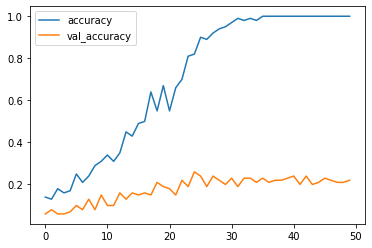

In [105]:
# Plot training and testing curves

import pandas as pd

df = pd.DataFrame(history.history)
df.plot(y=['accuracy', 'val_accuracy'])

In [106]:
# Inspect the checkpoint directory

!ls -lh model_checkpoints_best

total 184K
-rw-r--r-- 1 root root   77 Jan 22 08:52 checkpoint
-rw-r--r-- 1 root root 174K Jan 22 08:52 checkpoint.data-00000-of-00001
-rw-r--r-- 1 root root 2.0K Jan 22 08:52 checkpoint.index


In [107]:
# Create a new model with the saved weights
new_model=get_new_model()
new_model.load_weights(checkpoint_best_path)
get_test_accuracy(new_model,x_test,y_test)

accuracy: 0.260


Clear directory

In [108]:
! rm -r model_checkpoints_5000 model_checkpoints_best

rm: cannot remove 'model_checkpoints_5000': No such file or directory


Saving the entire model
Create checkpoint that saves whole model, not just weights

In [109]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [110]:
# Create Tensorflow checkpoint object

checkpoint_path='model_checkpoint'
checkpoint=ModelCheckpoint(filepath=checkpoint_path,
                          save_weights_only=False,
                          frequency='epoch',
                          verbose=1)

In [111]:
# Create and fit model with checkpoint

model=get_new_model()
model.fit(x_train,y_train,epochs=3,callbacks=[checkpoint])

Epoch 1/3
4/4 [==============================] - 0s 22ms/step - loss: 2.2997 - accuracy: 0.1332

Epoch 00001: saving model to model_checkpoint
INFO:tensorflow:Assets written to: model_checkpoint/assets
Epoch 2/3
4/4 [==============================] - 0s 26ms/step - loss: 2.2646 - accuracy: 0.1793

Epoch 00002: saving model to model_checkpoint
INFO:tensorflow:Assets written to: model_checkpoint/assets
Epoch 3/3
4/4 [==============================] - 0s 23ms/step - loss: 2.2673 - accuracy: 0.2182

Epoch 00003: saving model to model_checkpoint
INFO:tensorflow:Assets written to: model_checkpoint/assets


In [112]:
#Inspect what the checkpoint has created

# Have a look at what the checkpoint creates
! ls -lh model_checkpoint


total 136K
drwxr-xr-x 2 root root 4.0K Jan 22 08:52 assets
-rw-r--r-- 1 root root 127K Jan 22 08:52 saved_model.pb
drwxr-xr-x 2 root root 4.0K Jan 22 08:52 variables


In [113]:
# Enter variables directory

! ls -lh model_checkpoint/variables

total 184K
-rw-r--r-- 1 root root 177K Jan 22 08:52 variables.data-00000-of-00001
-rw-r--r-- 1 root root 2.2K Jan 22 08:52 variables.index


In [114]:
# Get the model's test accuracy

get_test_accuracy(model,x_test,y_test)

accuracy: 0.090


Create new model from scratch

In [115]:
# Delete model
del_model=get_new_model()


In [116]:
from tensorflow.keras.models import load_model

In [117]:
# Reload model from scratch
del_model=load_model(checkpoint_path)
get_test_accuracy(del_model,x_test,y_test)

accuracy: 0.090


Use the .h5 format to save model

In [118]:
# Save the model in .h5 format
model.save('my_model.h5')

In [119]:
# Inspect .h5 file

! ls -lh my_model.h5

-rw-r--r-- 1 root root 211K Jan 22 08:53 my_model.h5


In [120]:
# Delete model

del model

In [121]:
# Reload model from scratch

model=load_model('my_model.h5')
get_test_accuracy(model,x_test,y_test)

accuracy: 0.090


Clear directory

In [122]:
! rm -r model_checkpoints
! rm my_model.h5

rm: cannot remove 'model_checkpoints': No such file or directory


Loading pre-trained Keras models
Import and build Keras ResNet50 model
Today we'll be using the ResNet50 model designed by a team at Microsoft Research, available through Keras applications. Please see the description on the Keras applications page for details. If you continue using it, please cite it properly! The paper it comes from is:

Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun. "Deep Residual Learning for Image Recognition", 2015.

This model takes a long time to download on the Coursera platform, so it is pre-downloaded in your workspace and saved in Keras HDF5 format. If you want to import it on your personal machine, use the following code:

from tensorflow.keras.applications import ResNet50
model = ResNet50(weights='imagenet')
In this coding tutorial, you will instead load the model directly from disk.

In [123]:
from tensorflow.keras.models import load_model

In [128]:
# Build Keras ResNet50 model
model=load_model('models/Keras_ResNet50.h5')
model.summary()

OSError: ignored

In [129]:
##Import and preprocess 3 sample images
# Import 3 sample ImageNet images

from tensorflow.keras.preprocessing.image import load_img

lemon_img = load_img('data/lemon.jpg', target_size=(224, 224))
viaduct_img = load_img('data/viaduct.jpg', target_size=(224, 224))
water_tower_img = load_img('data/water_tower.jpg', target_size=(224, 224))

FileNotFoundError: ignored

Use ResNet50 model to classify images

In [130]:
# Useful function: presents top 5 predictions and probabilities

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import pandas as pd

def get_top_5_predictions(img):
    x = img_to_array(img)[np.newaxis, ...]
    x = preprocess_input(x)
    preds = decode_predictions(model.predict(x), top=5)
    top_preds = pd.DataFrame(columns=['prediction', 'probability'],
                             index=np.arange(5)+1)
    for i in range(5):
        top_preds.loc[i+1, 'prediction'] = preds[0][i][1]
        top_preds.loc[i+1, 'probability'] = preds[0][i][2] 
    return top_preds

In [127]:
#Image 1: lemon

# Display image
lemon_img

NameError: ignored

In [ ]:
# Display top 5 predictions

get_top_5_predictions(lemon_img)

In [ ]:
# Display image
viaduct_img

In [ ]:
# Display top 5 predictions

get_top_5_predictions(viaduct_img)

In [ ]:
# Display image
water_tower_img

In [ ]:
# Display top 5 predictions
get_top_5_predictions(water_tower_img)

Tensorflow Hub modules
Import and build Tensorflow Hub MobileNet v1 model
Today we'll be using Google's MobileNet v1 model, available on Tensorflow Hub. Please see the description on the Tensorflow Hub page for details on it's architecture, how it's trained, and the reference. If you continue using it, please cite it properly! The paper it comes from is:

Andrew G. Howard, Menglong Zhu, Bo Chen, Dmitry Kalenichenko, Weijun Wang, Tobias Weyand, Marco Andreetto, Hartwig Adam: "MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications", 2017.

This model takes a long time to download on the Coursera platform, so it is pre-downloaded in your workspace and saved in Tensorflow SavedModel format. If you want to import it on your personal machine, use the following code:

module_url = "https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4"
model = Sequential([hub.KerasLayer(module_url)])
model.build(input_shape=[None, 160, 160, 3])
In this coding tutorial, you will instead load the model directly from disk.


In [ ]:
import tensorflow_hub as hub
from tensorflow.keras.models import load_model,Sequential

In [ ]:
# Build Google's Mobilenet v1 model

module=load_model('models/Tensorflow_MobileNet_v1')
model=Sequential(hub.KerasLayer(module))
model.build(input_shape=[None,160,160,3])
model.summary()

In [ ]:
##Use MobileNet model to classify images

In [ ]:
# Import and preprocess 3 sample ImageNet images

from tensorflow.keras.preprocessing.image import load_img

lemon_img = load_img("data/lemon.jpg", target_size=(160, 160))
viaduct_img = load_img("data/viaduct.jpg", target_size=(160, 160))
water_tower_img = load_img("data/water_tower.jpg", target_size=(160, 160))

In [ ]:
# Read in categories text file

with open('data/imagenet_categories.txt') as txt_file:
    categories = txt_file.read().splitlines()

In [ ]:
# Useful function: presents top 5 predictions

import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array


def get_top_5_predictions(img):
    x = img_to_array(img)[np.newaxis,...] / 255.0
    preds = model.predict(x)
    top_preds = pd.DataFrame(columns=['prediction'],
                             index=np.arange(5)+1)
    sorted_index = np.argsort(-preds[0])
    for i in range(5):
        ith_pred = categories[sorted_index[i]]
        top_preds.loc[i+1, 'prediction'] = ith_pred
            
    return top_preds

In [ ]:
lemon_img

In [ ]:
get_top_5_predictions(lemon_img)

In [ ]:
viaduct_img

In [ ]:
get_top_5_predictions(viaduct_img)

In [ ]:
water_tower_img

In [ ]:
get_top_5_predictions(water_tower_img)